In [187]:
# !pip install xarray

# Dataset Download & Extraction:

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt


In [3]:

# Load NetCDF dataset
# https://zenodo.org/records/11045944
file_path = "../data/WASP_LW_SENT2_MED_L1C_B_201506_202109_10m_6y_NRT_v1.0.nc"
dataset = xr.open_dataset(file_path)

# Check the dataset structure
dataset.dims, dataset.attrs['Conventions']

(FrozenMappingWarningOnValuesAccess({'n_filaments': 14374, 'box_dims': 4, 'n_max_pixels_fil': 2563, 'n_bands': 13}),
 'CF-1.6')

In [4]:
dataset

<xarray.Dataset> Size: 2GB
Dimensions:       (n_filaments: 14374, box_dims: 4, n_max_pixels_fil: 2563,
                   n_bands: 13)
Dimensions without coordinates: n_filaments, box_dims, n_max_pixels_fil, n_bands
Data variables:
    s2_product    (n_filaments) |S65 934kB ...
    dec_time      (n_filaments) float64 115kB ...
    x_centroid    (n_filaments) float32 57kB ...
    y_centroid    (n_filaments) float32 57kB ...
    lat_centroid  (n_filaments) float64 115kB ...
    lon_centroid  (n_filaments) float64 115kB ...
    n_pixels_fil  (n_filaments) float64 115kB ...
    limits        (n_filaments, box_dims) float32 230kB ...
    pixel_x       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_y       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_spec    (n_filaments, n_max_pixels_fil, n_bands) float32 2GB ...
Attributes: (12/22)
    title:                 Mediterranean Sentinel-2 Litter Windrows Catalogue...
    institution:           Barcelona Expert Center (BEC), ICM-CSIC, Barcelona...
    url:                   http://bec.icm.csic.es
    email:                 m.arias@icm.csic.es m.arias@zenithalblue.com
    copyright:             BEC research products are freely distributed. If t...
    reference:             https://doi.org/10.5281/zenodo.11045944
    ...                    ...
    geospatial_lat_max:    45.740728823657236
    geospatial_lat_units:  degrees north
    geospatial_lon_min:    -6.703167546213006
    geospatial_lon_max:    36.20086905862957
    geospatial_lon_units:  degrees east
    spectral_bands:        B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, ...

In [25]:
dataset['limits'][0].values

array([2230., 2166., 2630., 2378.], dtype=float32)

In [ ]:
dataset['pixel_x'][0].values

array([2170., 2171., 2171., ...,   nan,   nan,   nan], dtype=float32)

In [5]:
# for attribute, value in dataset.attrs.items():
#     print("attribute :",attribute, "\nvalue : ",value, '\n')

In [6]:
dataset.data_vars

Data variables:
    s2_product    (n_filaments) |S65 934kB ...
    dec_time      (n_filaments) float64 115kB ...
    x_centroid    (n_filaments) float32 57kB ...
    y_centroid    (n_filaments) float32 57kB ...
    lat_centroid  (n_filaments) float64 115kB ...
    lon_centroid  (n_filaments) float64 115kB ...
    n_pixels_fil  (n_filaments) float64 115kB ...
    limits        (n_filaments, box_dims) float32 230kB ...
    pixel_x       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_y       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_spec    (n_filaments, n_max_pixels_fil, n_bands) float32 2GB ...

In [7]:

dataset.data_vars['pixel_spec']
# dataset.data_vars['pixel_spec'].values

<xarray.DataArray 'pixel_spec' (n_filaments: 14374, n_max_pixels_fil: 2563,
                                n_bands: 13)> Size: 2GB
[478927306 values with dtype=float32]
Dimensions without coordinates: n_filaments, n_max_pixels_fil, n_bands
Attributes:
    long_name:    Pixel Spectra
    units:        reflectance
    description:  Spectral L1c (TOA) reflectance values for pixel and band on...

In [8]:
dataset.data_vars['pixel_spec'].attrs

{'long_name': 'Pixel Spectra',
 'units': 'reflectance',
 'description': 'Spectral L1c (TOA) reflectance values for pixel and band on the filament.'}

In [9]:
dataset.data_vars

Data variables:
    s2_product    (n_filaments) |S65 934kB ...
    dec_time      (n_filaments) float64 115kB ...
    x_centroid    (n_filaments) float32 57kB ...
    y_centroid    (n_filaments) float32 57kB ...
    lat_centroid  (n_filaments) float64 115kB ...
    lon_centroid  (n_filaments) float64 115kB ...
    n_pixels_fil  (n_filaments) float64 115kB ...
    limits        (n_filaments, box_dims) float32 230kB ...
    pixel_x       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_y       (n_filaments, n_max_pixels_fil) float32 147MB ...
    pixel_spec    (n_filaments, n_max_pixels_fil, n_bands) float32 2GB ...

# Visualization

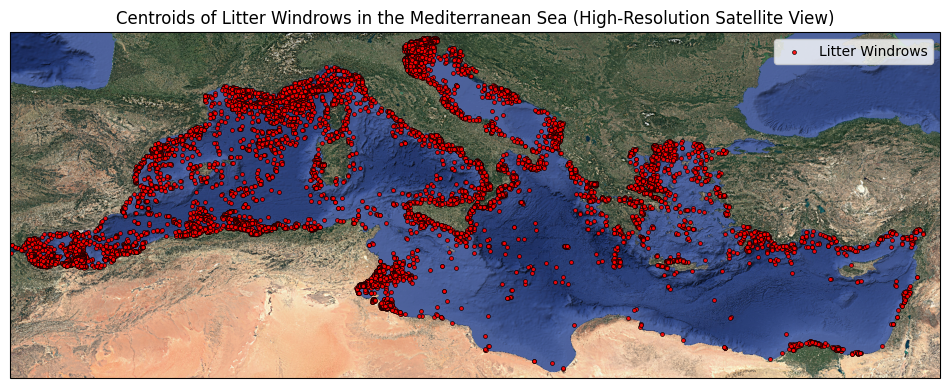

In [68]:


# Assuming dataset is a dictionary-like structure or xarray Dataset
lat_centroid = dataset['lat_centroid'].values
lon_centroid = dataset['lon_centroid'].values

# Define Mediterranean Sea boundaries
lat_min, lat_max = 30, 46
lon_min, lon_max = -6, 37

# Apply the mask
mask = (lat_centroid >= lat_min) & (lat_centroid <= lat_max) & \
       (lon_centroid >= lon_min) & (lon_centroid <= lon_max)

# Filtered data
lat_med = lat_centroid[mask]
lon_med = lon_centroid[mask]

# High-resolution ESRI satellite map
satellite = cimgt.GoogleTiles(style="satellite")  # You can change this to other providers below Note it will take around 2 Minutes to be processed 

# Create figure
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})



ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add satellite imagery as background
ax.add_image(satellite, 10)  # Higher zoom for better resolution (try to 10 for more detail)

# Scatter plot of centroids with improved visibility
ax.scatter(lon_med, lat_med, c='red', s=8, alpha=0.9, edgecolors="black", linewidth=0.5, transform=ccrs.PlateCarree(), label="Litter Windrows")

# Title and legend
ax.set_title("Centroids of Litter Windrows in the Mediterranean Sea (High-Resolution Satellite View)")
plt.legend()
plt.show()


# Create a Binary masks

In [10]:
dataset['pixel_spec'].values

array([[[0.1443, 0.123 , 0.0918, ..., 0.0008, 0.0041, 0.0026],
        [0.1443, 0.1219, 0.0924, ..., 0.0008, 0.0042, 0.0024],
        [0.1443, 0.1224, 0.0946, ..., 0.0008, 0.0052, 0.0033],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[0.1351, 0.0997, 0.0573, ..., 0.0002, 0.0021, 0.0022],
        [0.1351, 0.1009, 0.0572, ..., 0.0002, 0.0021, 0.0022],
        [0.139 , 0.1056, 0.062 , ..., 0.0004, 0.0033, 0.0025],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[0.1316, 0.1126, 0.1042, ..., 0.0005, 0.005 , 0.0032],
        [0.1329, 0.1187, 0.1084, ..., 0.0006, 0.0056, 0.0026],
        [0.1329, 0.1207, 0.1081, ..., 0.0006, 0.0081, 0.0035],
        ...,
        [   

In [62]:
dataset['pixel_x'].values[0]

array([2170., 2171., 2171., ...,   nan,   nan,   nan], dtype=float32)

In [67]:
dataset['pixel_x'].values[0].shape

(2563,)

/var/folders/kc/yw8k7d7n6v3b4_rzwv4lfn7h0000gn/T/ipykernel_2326/1918355334.py:23: RuntimeWarning: invalid value encountered in cast
  rel_x = np.round(pixels_x - center_x + canvas_size // 2).astype(int)
/var/folders/kc/yw8k7d7n6v3b4_rzwv4lfn7h0000gn/T/ipykernel_2326/1918355334.py:24: RuntimeWarning: invalid value encountered in cast
  rel_y = np.round(pixels_y - center_y + canvas_size // 2).astype(int)


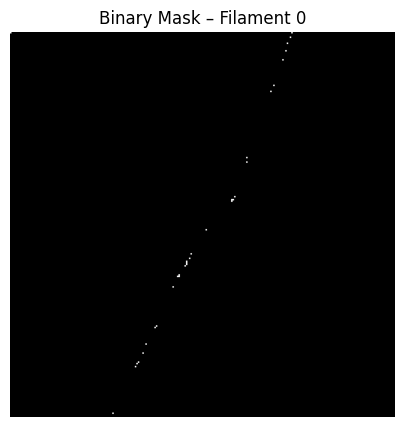

In [76]:

# Define the size of the mask canvas (centered around the filament)
canvas_size = 256 # pixels

# Get the centroid coordinates of the first filament
center_x = dataset['x_centroid'].values[0]
center_y = dataset['y_centroid'].values[0]

# Create an empty binary mask (all zeros)
mask = np.zeros((canvas_size, canvas_size), dtype=np.uint8)

# # Extract pixel coordinates and replace NaNs with 0
# pixels_x = np.nan_to_num(dataset['pixel_x'].values, nan=0)
# pixels_y = np.nan_to_num(dataset['pixel_y'].values, nan=0)

pixels_x = dataset['pixel_x'].values[0]
pixels_y = dataset['pixel_y'].values[0]

# Remove invalid pixel values (where pixel_x == -999)
valid_mask = pixels_x != -999
pixels_x, pixels_y = pixels_x[valid_mask], pixels_y[valid_mask]

# Offset coordinates to center the mask on the filament
rel_x = np.round(pixels_x - center_x + canvas_size // 2).astype(int)
rel_y = np.round(pixels_y - center_y + canvas_size // 2).astype(int)

# Ensure all pixel indices are within the valid range (inside the canvas)
valid_indices = (0 <= rel_x) & (rel_x < canvas_size) & (0 <= rel_y) & (rel_y < canvas_size)

# Set valid pixel locations to 1 in the binary mask
mask[rel_y[valid_indices], rel_x[valid_indices]] = 1

# Display the binary mask
plt.figure(figsize=(5, 5))
plt.imshow(mask, cmap='gray')
plt.title("Binary Mask – Filament 0")
plt.axis('off')
plt.show()
